In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
from covid19world import *

In [3]:
data = get_world_covid_data()
len(data)

2

In [4]:
list(data[0])[:5]

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']

In [5]:
data[1][:5]

[{'date': '2020-1-22', 'deaths': 17, 'confirmed': 555, 'recovered': 28},
 {'date': '2020-1-23', 'deaths': 18, 'confirmed': 654, 'recovered': 30},
 {'date': '2020-1-24', 'deaths': 26, 'confirmed': 941, 'recovered': 36},
 {'date': '2020-1-25', 'deaths': 42, 'confirmed': 1434, 'recovered': 39},
 {'date': '2020-1-26', 'deaths': 56, 'confirmed': 2118, 'recovered': 52}]

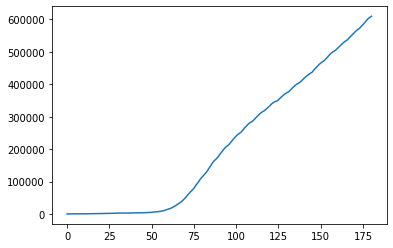

In [6]:
plt.plot([d['deaths'] for d in data[1]])

In [7]:
data[0]['Chile'][0]

{'date': '2020-1-22', 'confirmed': 0, 'deaths': 0, 'recovered': 0}

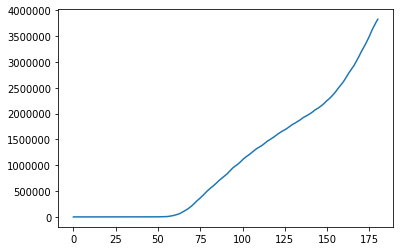

In [8]:
plt.plot([d['confirmed'] for d in data[0]['US']])

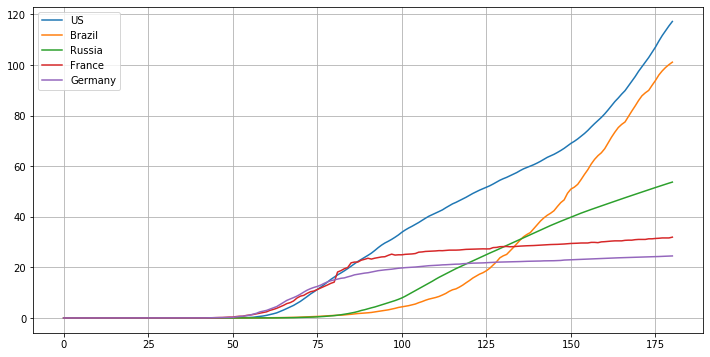

In [9]:
plt.rcParams['figure.figsize'] = [12, 6]
allCountries = list(data[0])
for country in ['US','Brazil','Russia','France','Germany']:
    plt.plot([d['confirmed']/getCountryPop(country)*10000 for d in data[0][country]],label=country)
plt.legend()
plt.grid()

In [10]:
for country in list(data[0]):
    z = [d['population'] for d in countryData if d['country']==country]
    if (len(z)==0):
        print(country)

Cabo Verde
Congo (Brazzaville)
Congo (Kinshasa)
Cote d'Ivoire
Diamond Princess
Czechia
Eswatini
Fiji
Holy See
Korea, South
Russia
Serbia
Sri Lanka
Taiwan*
US
Timor-Leste
Libya
West Bank and Gaza
Kosovo
Burma
MS Zaandam


In [11]:
[d['country'] for d in countryData if d['country'] not in list(data[0])]
getCountryPop('US')

326687501

In [77]:
for country in list(data[0])[:5]:
    print(data[0][country][-1])
countriesByCasesPerCapita = [(country, data[0][country][-1]['deaths']/getCountryPop(country)*10000) for country in list(data[0])]
countriesByCasesPerCapita = sorted(countriesByCasesPerCapita,key=lambda x: x[1],reverse=True)
countriesByCasesPerCapita


{'date': '2020-7-20', 'confirmed': 35526, 'deaths': 1185, 'recovered': 23741}
{'date': '2020-7-20', 'confirmed': 4171, 'deaths': 113, 'recovered': 2352}
{'date': '2020-7-20', 'confirmed': 23691, 'deaths': 1087, 'recovered': 16400}
{'date': '2020-7-20', 'confirmed': 884, 'deaths': 52, 'recovered': 803}
{'date': '2020-7-20', 'confirmed': 749, 'deaths': 29, 'recovered': 221}


[('San Marino', 12.431552464111293),
 ('Belgium', 8.575859755086391),
 ('United Kingdom', 6.830689892306306),
 ('Andorra', 6.752720567228527),
 ('Spain', 6.073525948713303),
 ('Italy', 5.802214301602602),
 ('Sweden', 5.5418981851389075),
 ('Chile', 4.539979369069409),
 ('France', 4.506017257508599),
 ('US', 4.3131738915227125),
 ('Peru', 4.122321569466949),
 ('Brazil', 3.8249035719228646),
 ('Ireland', 3.6015794353717836),
 ('Netherlands', 3.571921021489327),
 ('Mexico', 3.1289922684372176),
 ('Ecuador', 3.112789085360368),
 ('Panama', 2.698190727848321),
 ('Moldova', 2.568320085852104),
 ('Canada', 2.4021955992219173),
 ('Switzerland', 2.3152207735092696),
 ('Armenia', 2.2020641132660472),
 ('North Macedonia', 2.072571672838804),
 ('Bolivia', 1.9536441982316437),
 ('Luxembourg', 1.8258080434246238),
 ('Iran', 1.7609966539352089),
 ('Portugal', 1.6443302888750895),
 ('Kyrgyzstan', 1.6400961599291453),
 ('Colombia', 1.3956059460587928),
 ('Germany', 1.0969078127747471),
 ('Denmark', 1.0

'done'

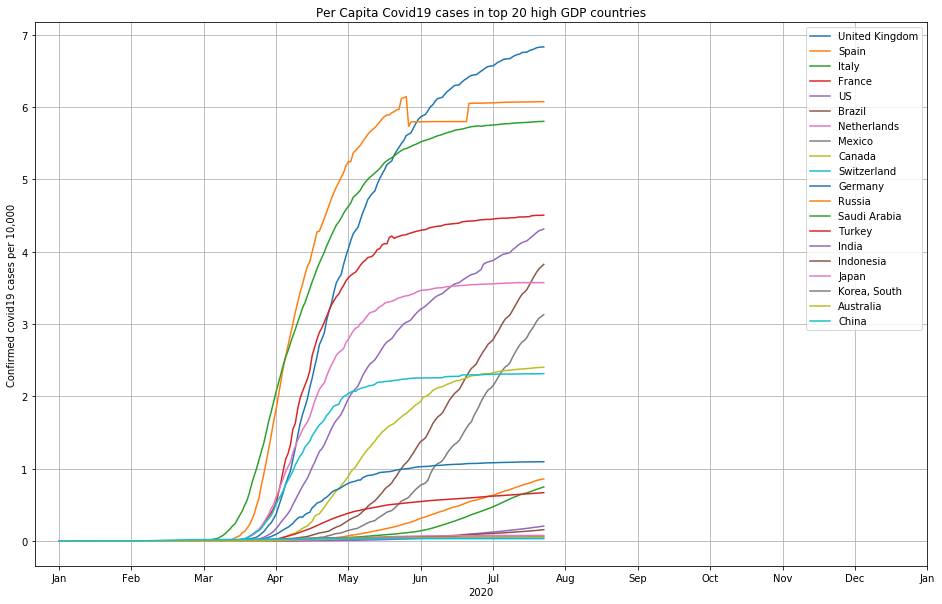

In [79]:
plt.rcParams['figure.figsize'] = [16, 10]
fig, ax = plt.subplots()
topCountries = [d[0] for d in countriesByCasesPerCapita]
topGDP = ['US','China','Japan','Germany','India',
          'United Kingdom','France','Italy','Brazil','Canada',
          'Russia','Korea, South','Spain','Australia','Mexico',
          'Indonesia','Netherlands','Saudi Arabia','Turkey','Switzerland']
topGDPsorted = [d[0] for d in countriesByCasesPerCapita if d[0] in topGDP]
for country in topGDPsorted[0:20]:
    plt.plot(([0]*21)+[d['deaths']/getCountryPop(country)*10000 for d in data[0][country]],label=country)
plt.legend()
plt.grid()
plt.title("Per Capita Covid19 cases in top 20 high GDP countries")
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360],'Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec Jan'.split(' '))
plt.xlabel("2020")
plt.ylabel("Confirmed covid19 cases per 10,000")
fig.savefig("plots/plot_deaths_top20GDP.png")
'done'

Text(0, 0.5, 'confirmed cases per 10,000')

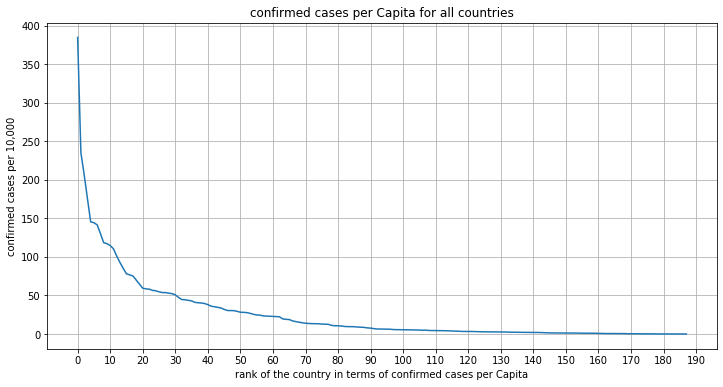

In [40]:
plt.rcParams['figure.figsize'] = [12, 6]
topCountries = [d[0] for d in countriesByCasesPerCapita]
plt.plot([d[1] for d in countriesByCasesPerCapita])
plt.xticks(np.arange(0,200,step=10))
plt.grid()
plt.title("confirmed cases per Capita for all countries")
plt.xlabel("rank of the country in terms of confirmed cases per Capita")
plt.ylabel("confirmed cases per 10,000")

In [56]:
[0]*21


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]